In [1]:
import numpy as np
import pandas as pd

In [2]:
train=pd.read_csv('Churn History Dataset.csv')
test=pd.read_csv('Churn Test Dataset.csv')

In [3]:
train.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Y_var
0,KS,128,415,382-4657,no,yes,25,265.1,110.0,45.07,...,99,16.78,244.7,91.0,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123.0,27.47,...,103,16.62,254.4,103.0,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114.0,41.38,...,110,10.30,162.6,104.0,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,7100.0,1500.90,...,88,5.26,196.9,89.0,8.86,600.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113.0,28.34,...,122,12.61,186.9,121.0,8.41,10.1,3,2.73,3,False.


In [4]:
test.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn Indicator
0,HI,101,510,354-8814,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,False.
1,MT,137,510,381-7210,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,False.
2,OH,103,408,411-9480,yes,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,False.
3,NM,99,415,418-9103,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,False.
4,SC,108,415,413-3646,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,False.


 <h2> 1.Data Cleaning <h2>

In [5]:
print ('Number of data points : ', train.shape[0], \
       'Number of features/variables:', train.shape[1])

Number of data points :  3333 Number of features/variables: 21


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account length                 3333 non-null   int64  
 2   area code                      3333 non-null   int64  
 3   phone number                   3333 non-null   object 
 4   international plan             3333 non-null   object 
 5   voice mail plan                3333 non-null   object 
 6   number vmail messages          3333 non-null   int64  
 7   total day minutes              3333 non-null   float64
 8   total day calls                3332 non-null   float64
 9   total day charge               3332 non-null   float64
 10  total eve minutes              3331 non-null   float64
 11  total eve calls                3333 non-null   int64  
 12  total eve charge               3332 non-null   f

In [7]:
train.isnull().sum()

state                            0
account length                   0
area code                        0
phone number                     0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  1
total day charge                 1
total eve minutes                2
total eve calls                  0
total eve charge                 1
total night minutes              0
total night calls                2
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Y_var                            0
dtype: int64

In [8]:
print("no of duplicates in train is: {}".format(sum(train.duplicated())))
print("no of duplicates in test is: {}".format(sum(test.duplicated())))

no of duplicates in train is: 0
no of duplicates in test is: 0


In [9]:
print("We have {} NaN/Null values in train dataset".format(train.isnull().values.sum()))
print("We have {} NaN/Null values in test dataset".format(test.isnull().values.sum()))

We have 7 NaN/Null values in train dataset
We have 0 NaN/Null values in test dataset


In [13]:
train[train.isnull().any(1)]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Y_var


In [11]:
train.fillna(train.median(),inplace=True)

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

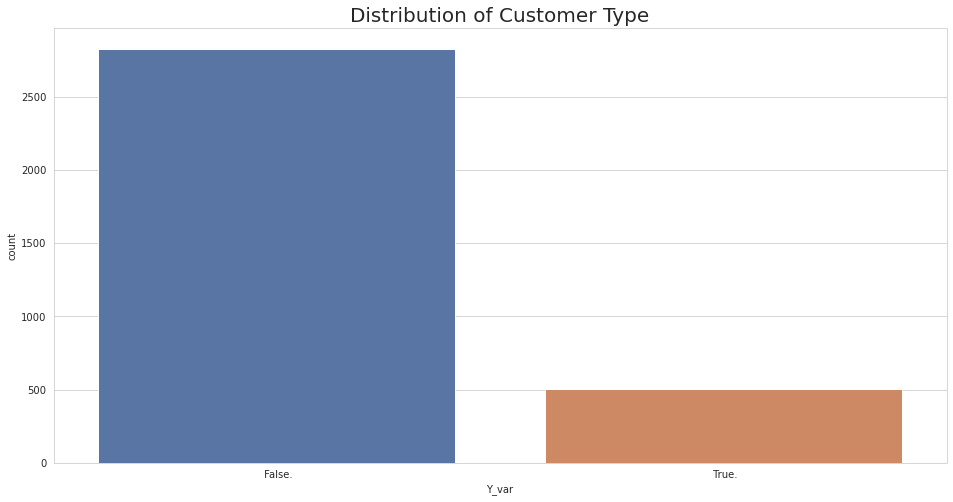

In [12]:
plt.figure(figsize=(16,8))
plt.title('Distribution of Customer Type', fontsize=20)
sns.countplot(x="Y_var",data=train,palette="deep")
plt.show()

#### It is clear that we have a Class Imbalance problem

<h2> Features Exploration <h2>

### Exploratory Data Analysis

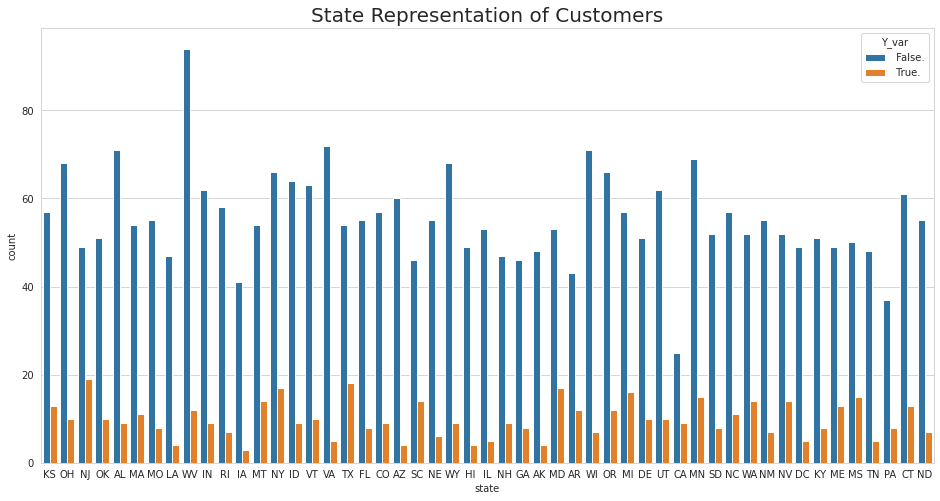

In [14]:
plt.figure(figsize=(16,8))
plt.title('State Representation of Customers', fontsize=20)
sns.countplot(x="state",data=train,hue="Y_var")
plt.show()

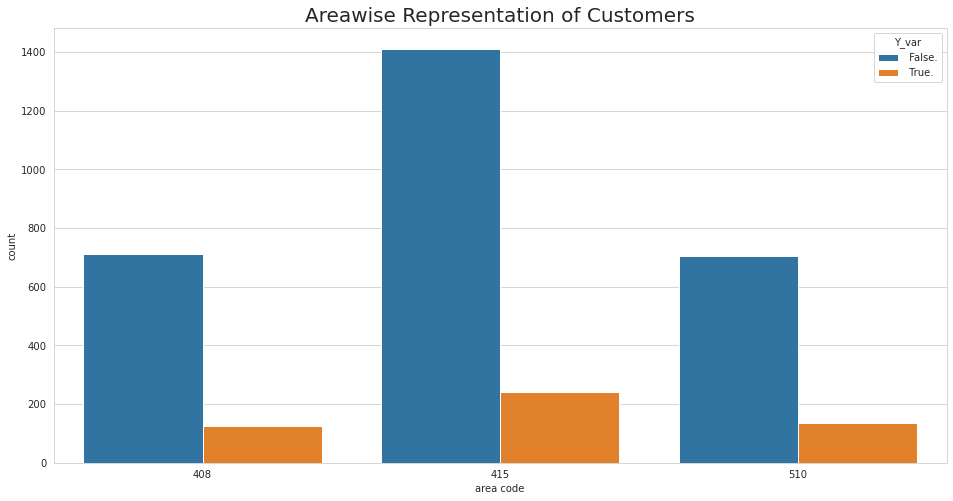

In [15]:
plt.figure(figsize=(16,8))
plt.title('Areawise Representation of Customers', fontsize=20)
sns.countplot(x="area code",data=train,hue="Y_var")
plt.show()

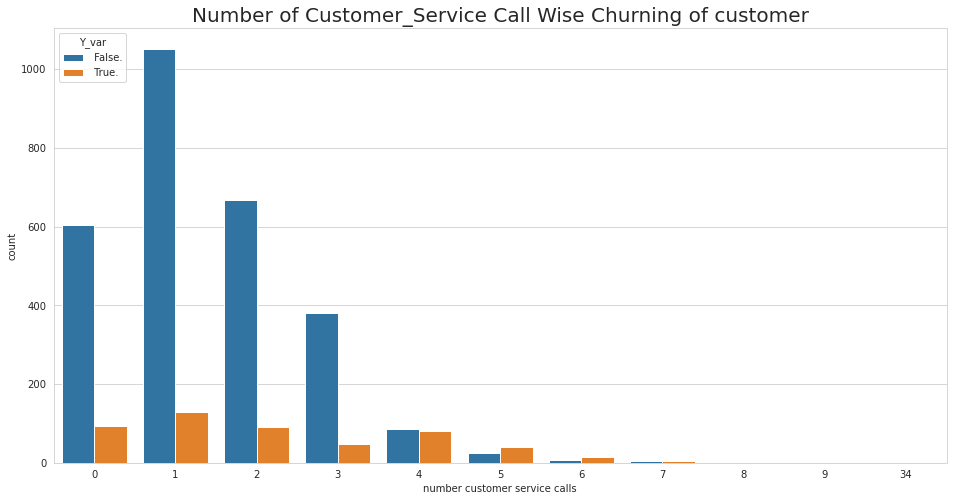

In [16]:
plt.figure(figsize=(16,8))
plt.title('Number of Customer_Service Call Wise Churning of customer', fontsize=20)
sns.countplot(x="number customer service calls",data=train,hue="Y_var")
plt.show()

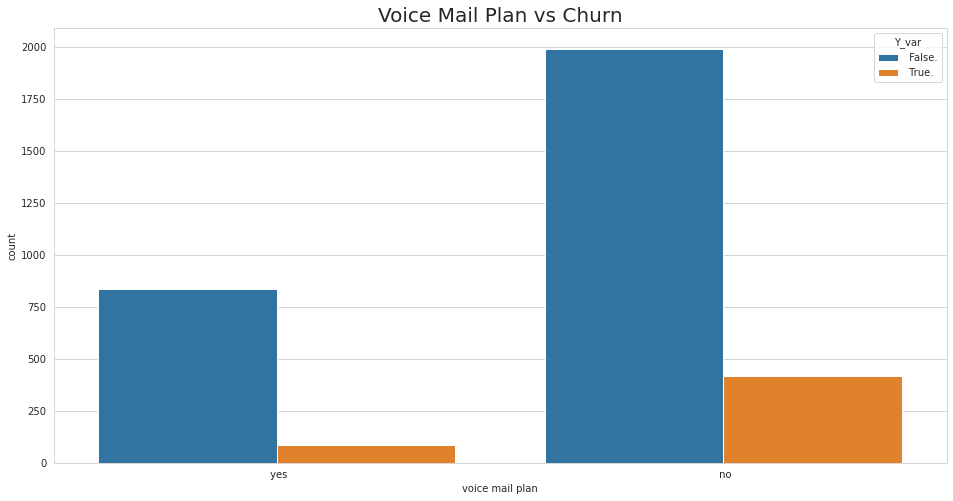

In [17]:
plt.figure(figsize=(16,8))
plt.title('Voice Mail Plan vs Churn', fontsize=20)
sns.countplot(x="voice mail plan",data=train,hue="Y_var")
plt.show()

In [18]:
ex=pd.crosstab(index=train["voice mail plan"],columns=train["Y_var"],colnames=["Churn Customer"])
ex["Total"]=ex.sum(1)
ex["Churn_Percentage"]=ex[" True."]/ex["Total"]

In [19]:
ex

Churn Customer,False.,True.,Total,Churn_Percentage
voice mail plan,,,,
no,1992,419,2411,0.173787
yes,837,85,922,0.092191


* 922 customer using voice mail plan and 85 out of them are churning
* It seems most of the churned customer don't have voice mail plan .So some discount offer on voice mail can attract customers to stay and experience the voice mail facillities

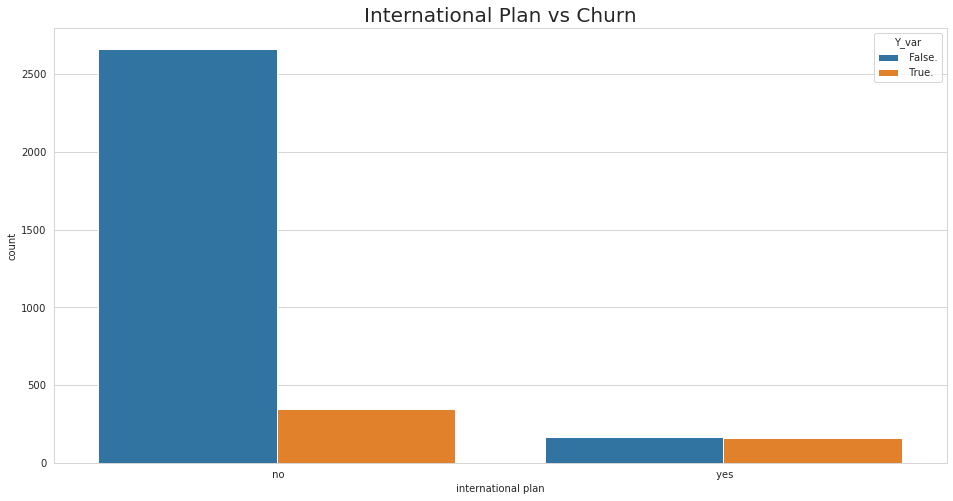

In [20]:
plt.figure(figsize=(16,8))
plt.title('International Plan vs Churn', fontsize=20)
sns.countplot(x="international plan",data=train,hue="Y_var")
plt.show()

In [21]:
ex=pd.crosstab(index=train["international plan"],columns=train["Y_var"],colnames=["Churn Customer"])
ex["Total"]=ex.sum(1)
ex["Churn_Percentage"]=ex[" True."]/ex["Total"]

In [22]:
ex

Churn Customer,False.,True.,Total,Churn_Percentage
international plan,,,,
no,2664,346,3010,0.114950
yes,165,158,323,0.489164


* Churn rate is more with customer using international plan. As only 323 customer using International plan and 158 churning out of them which is 49% approximately

In [23]:
mask=train[(train["international plan"]==" yes") & (train["voice mail plan"]==" yes")]
mask["Y_var"].value_counts()/mask.shape[0]

 False.    0.554348
 True.     0.445652
Name: Y_var, dtype: float64

In [24]:
print("{}% of customer have both voice mail plan and international plan out of which " \
      "customer churn rate is {}% which is equivalent "
      " to {}% of total customers"\
      .format(round(mask.shape[0]/train.shape[0]*100,2),45,round(mask[mask["Y_var"]==" True."].shape[0]/train.shape[0]*100,2)))

2.76% of customer have both voice mail plan and international plan out of which customer churn rate is 45% which is equivalent  to 1.23% of total customers


In [25]:
#find numerical and categorical datatype
categorical=[]
numerical=[]
for col in train.columns:
    if train[col].dtype==object:
        categorical.append(col)
    else:
        numerical.append(col)

In [26]:
data=train.copy()

In [27]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Y_var
0,KS,128,415,382-4657,no,yes,25,265.1,110.0,45.07,...,99,16.78,244.7,91.0,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123.0,27.47,...,103,16.62,254.4,103.0,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114.0,41.38,...,110,10.30,162.6,104.0,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,7100.0,1500.90,...,88,5.26,196.9,89.0,8.86,600.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113.0,28.34,...,122,12.61,186.9,121.0,8.41,10.1,3,2.73,3,False.


In [28]:
numerical

['account length',
 'area code',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'number customer service calls']

#### Account Length

C:\Users\RN7\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


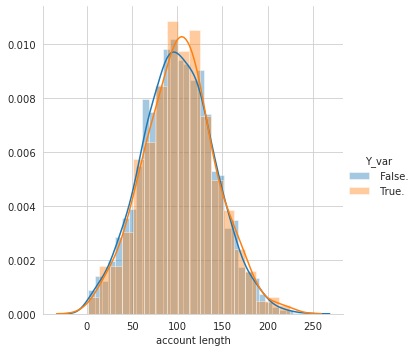

In [29]:
sns.FacetGrid(data, hue="Y_var", size=5) \
   .map(sns.distplot, "account length") \
   .add_legend();
plt.show();

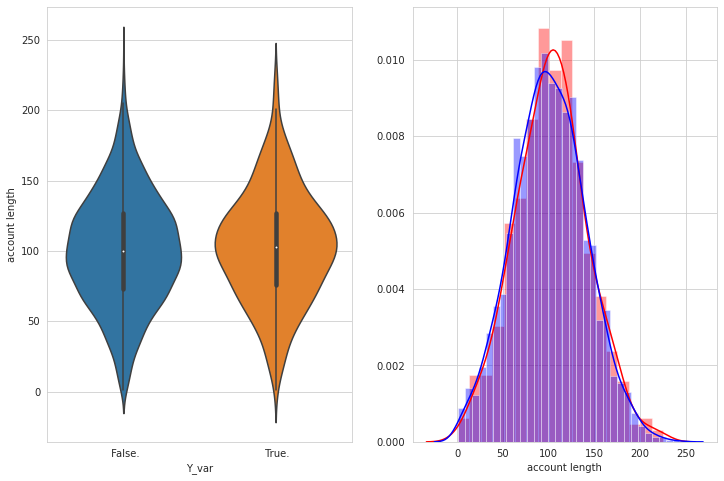

In [30]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'Y_var', y = 'account length', data = data)

plt.subplot(1,2,2)
sns.distplot(data[data['Y_var'] == ' True.']["account length"] , color = 'red')
sns.distplot(data[data['Y_var'] == ' False.']["account length"]  , color = 'blue' )
plt.show()

* From account length Feature alone we can't distinguish between churn and retained customer.So This feature is not that important for us

   #### Total Day Minutes

In [39]:
data["total day minutes"].describe()

count     3333.000000
mean       190.740294
std        598.879213
min          0.000000
25%        143.700000
50%        179.400000
75%        216.600000
max      34545.000000
Name: total day minutes, dtype: float64

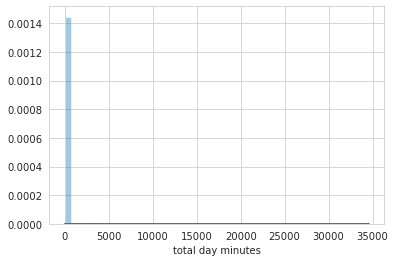

In [40]:
sns.distplot(data["total day minutes"])

* There is Outlier in Total Day Minutes feature.Since  day is only for 12 hour and in 12 hour we have 720 minutes .
* But here are some entries which is more than 720.So we consider those as outlier and remove them

In [41]:
Q1=np.percentile(data["total day minutes"],25)
Q3=np.percentile(data["total day minutes"],75)
IQR=Q3-Q1
lower_limit=Q1-1.5* IQR
upper_limit=Q3+1.5* IQR

In [42]:
data=data[data["total day minutes"]<upper_limit]

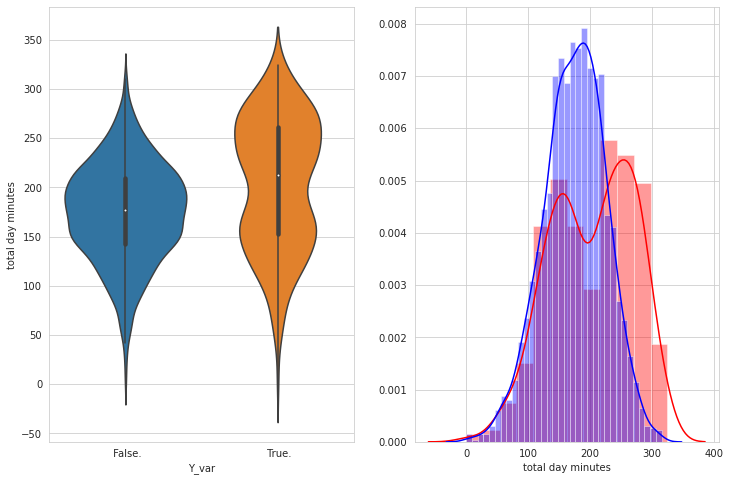

In [43]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'Y_var', y = 'total day minutes', data = data)

plt.subplot(1,2,2)
sns.distplot(data[data['Y_var'] == ' True.']["total day minutes"] , color = 'red')
sns.distplot(data[data['Y_var'] == ' False.']["total day minutes"]  , color = 'blue' )
plt.show()

In [44]:
k=data[data["total day minutes"]>260]

In [45]:
k.groupby("Y_var")["total day minutes"].count()/k.shape[0]*100

Y_var
 False.    46.835443
 True.     53.164557
Name: total day minutes, dtype: float64

* 54% of customer having total day minutes more than 260 are more likely to churn
* Probabillity density Function(pdf) of both the label are overlaping .So we can't set a threshold to distingush our churned customer from retained customer


   #### Total Day Charge

In [46]:
data["total day charge"].describe()

count    3320.000000
mean       30.912386
std        27.107291
min         0.000000
25%        24.410000
50%        30.480000
75%        36.720000
max      1500.900000
Name: total day charge, dtype: float64

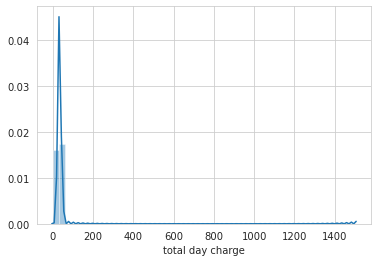

In [47]:
sns.distplot(data["total day charge"])

* There is  a Outlier in Total Day charge feature having 1500 charge and 7100 day calls which is irrelevant .

In [48]:
Q1=np.percentile(data["total day charge"],25)
Q3=np.percentile(data["total day charge"],75)
IQR=Q3-Q1
lower_limit=Q1-3* IQR
upper_limit=Q3+3* IQR

In [49]:
data=data[data["total day charge"]<upper_limit]

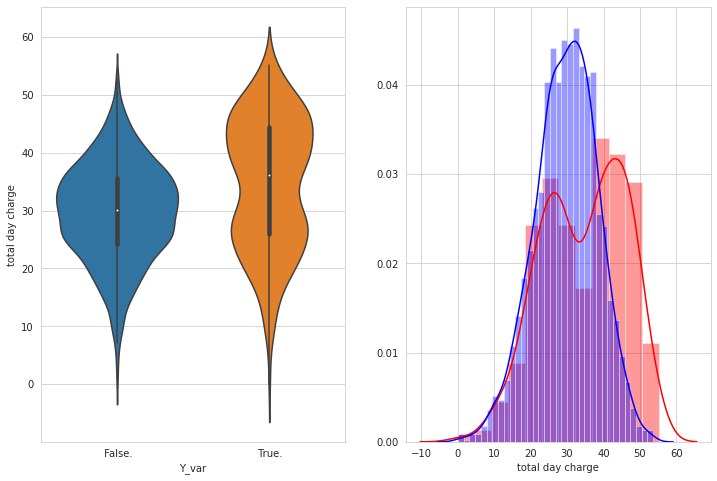

In [50]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'Y_var', y = 'total day charge', data = data)

plt.subplot(1,2,2)
sns.distplot(data[data['Y_var'] == ' True.']["total day charge"] , color = 'red')
sns.distplot(data[data['Y_var'] == ' False.']["total day charge"]  , color = 'blue' )
plt.show()

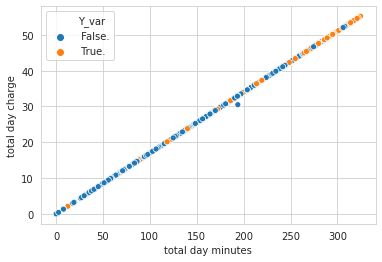

In [51]:
sns.scatterplot(x="total day minutes",y="total day charge",data=data,hue="Y_var")

#### For longer call duration charge is also so high .So Customers are churning in that category  

* Probabillity density Function(pdf) of both the label are overlaping .So we can't set a threshold to distingush our churned customer from retained customer
* Here the it seems total day minute and total day charge linearly dependant to each other .Hence we can drop any one of the feature

In [52]:
data["total day calls"].describe()

count    3319.000000
mean      100.492920
std        20.047394
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: total day calls, dtype: float64

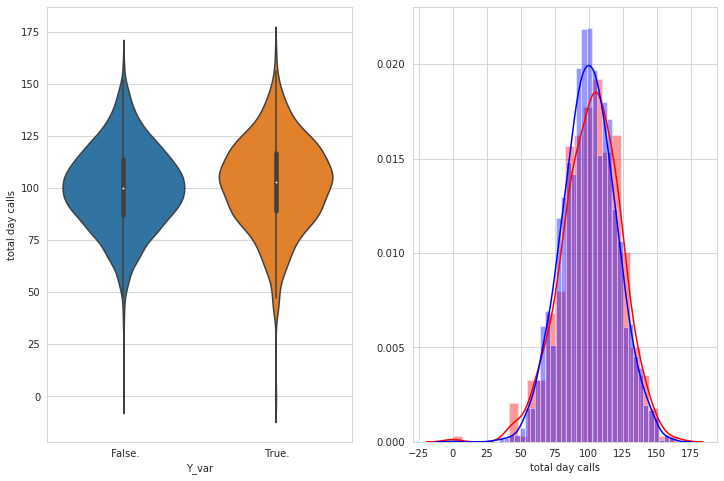

In [53]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'Y_var', y = 'total day calls', data = data)

plt.subplot(1,2,2)
sns.distplot(data[data['Y_var'] == ' True.']["total day calls"] , color = 'red')
sns.distplot(data[data['Y_var'] == ' False.']["total day calls"]  , color = 'blue' )
plt.show()

* SInce PDF of both the label are almost same .We can not predict churned customer by seeing these Total day call featurs

#### Total Eve Minutes

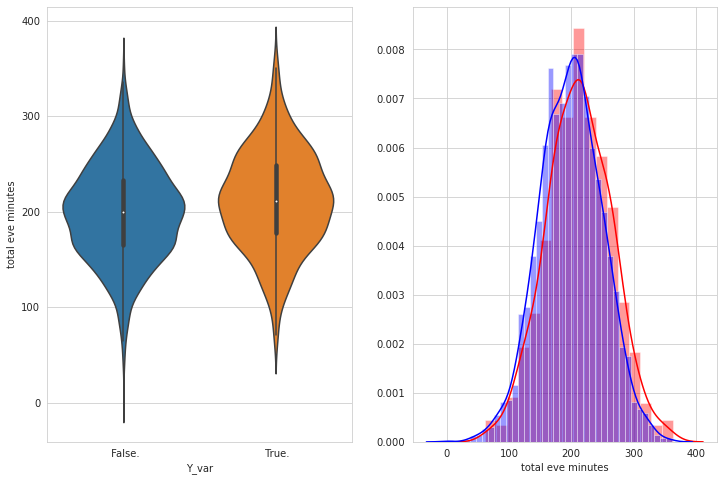

In [54]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'Y_var', y = 'total eve minutes', data = data)

plt.subplot(1,2,2)
sns.distplot(data[data['Y_var'] == ' True.']["total eve minutes"] , color = 'red')
sns.distplot(data[data['Y_var'] == ' False.']["total eve minutes"]  , color = 'blue' )
plt.show()

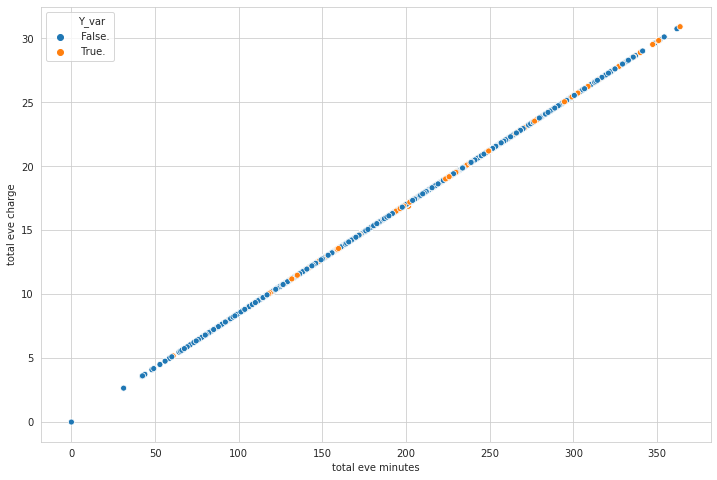

In [55]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x="total eve minutes",y="total eve charge",data=data,hue="Y_var")

   #### Total Eve Call

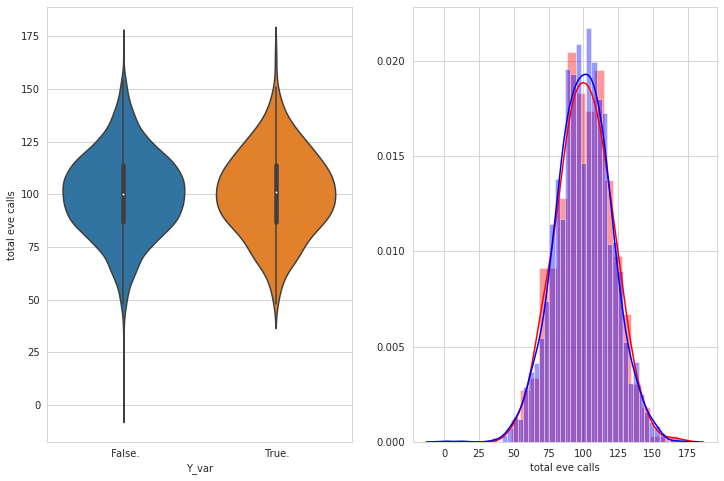

In [56]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'Y_var', y = 'total eve calls', data = data)

plt.subplot(1,2,2)
sns.distplot(data[data['Y_var'] == ' True.']['total eve calls'] , color = 'red')
sns.distplot(data[data['Y_var'] == ' False.']['total eve calls']  , color = 'blue' )
plt.show()

#### Total Night Minutes

In [57]:
data["total night minutes"].describe()

count    3319.000000
mean      201.747647
std        75.531357
min        23.200000
25%       167.000000
50%       201.200000
75%       235.300000
max      3434.340000
Name: total night minutes, dtype: float64

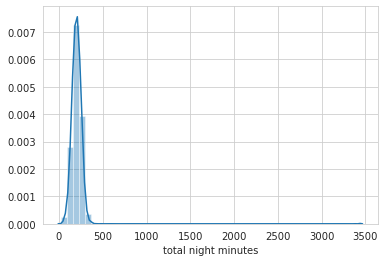

In [58]:
sns.distplot(data["total night minutes"])

In [59]:
data[data["total night minutes"]>500]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Y_var
289,OK,89,510,352-6976,no,no,0,303.9,95.0,51.66,...,114,22.18,3434.34,987.0,23423.0,364.0,34,34545.0,34,True.


In [60]:
Q1=np.percentile(data["total night minutes"],25)
Q3=np.percentile(data["total night minutes"],75)
IQR=Q3-Q1
lower_limit=Q1-3* IQR
upper_limit=Q3+3* IQR

In [61]:
data=data[data["total night minutes"]<upper_limit]

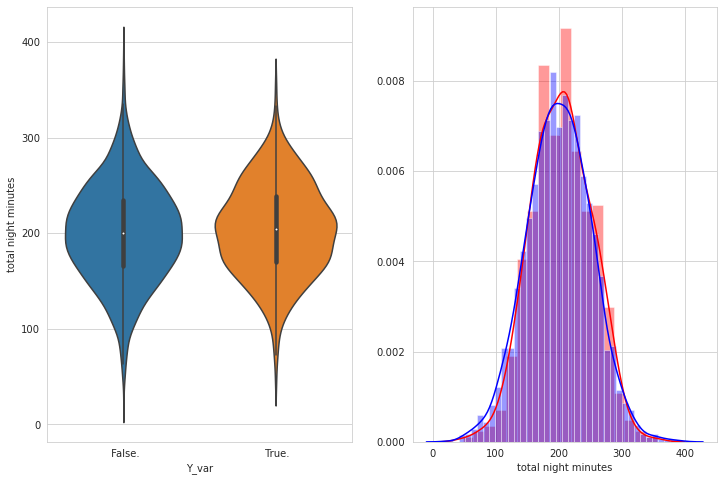

In [62]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'Y_var', y = 'total night minutes', data = data)

plt.subplot(1,2,2)
sns.distplot(data[data['Y_var'] == ' True.']["total night minutes"] , color = 'red')
sns.distplot(data[data['Y_var'] == ' False.']["total night minutes"]  , color = 'blue' )
plt.show()

In [63]:
mask = (data["total night minutes"]>=190) & (data["total night minutes"]<=220)
k=data.loc[mask,:]
k.groupby("Y_var")["total night minutes"].count()

Y_var
 False.    639
 True.     125
Name: total night minutes, dtype: int64

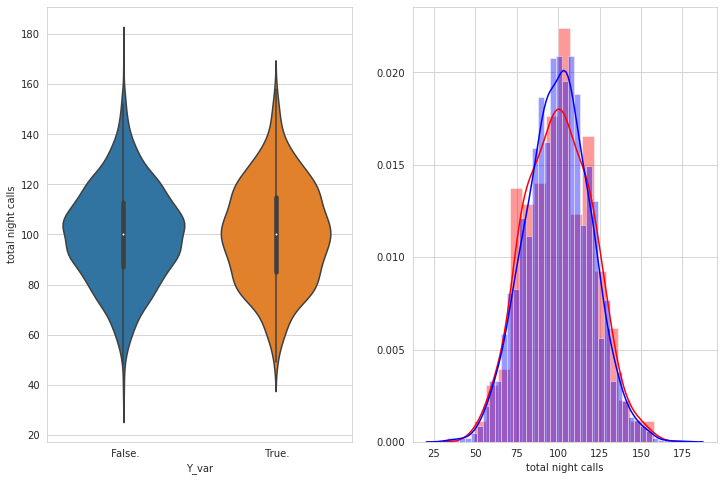

In [64]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'Y_var', y = 'total night calls', data = data)

plt.subplot(1,2,2)
sns.distplot(data[data['Y_var'] == ' True.']["total night calls"] , color = 'red')
sns.distplot(data[data['Y_var'] == ' False.']["total night calls"]  , color = 'blue' )
plt.show()

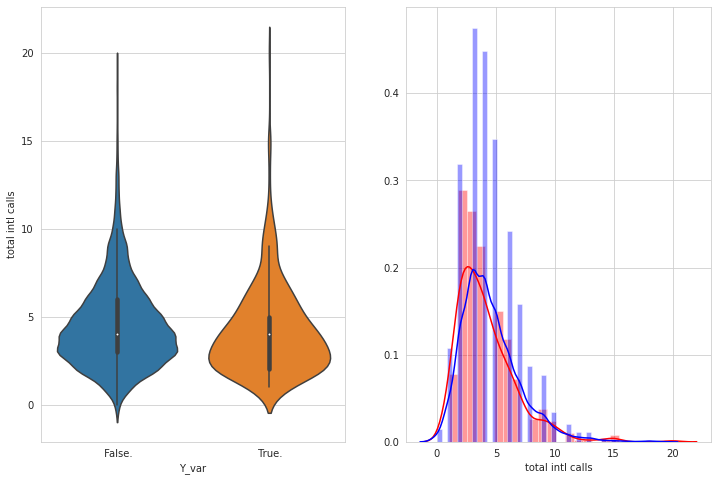

In [65]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'Y_var', y = 'total intl calls', data = data)

plt.subplot(1,2,2)
sns.distplot(data[data['Y_var'] == ' True.']["total intl calls"] , color = 'red')
sns.distplot(data[data['Y_var'] == ' False.']["total intl calls"]  , color = 'blue' )
plt.show()

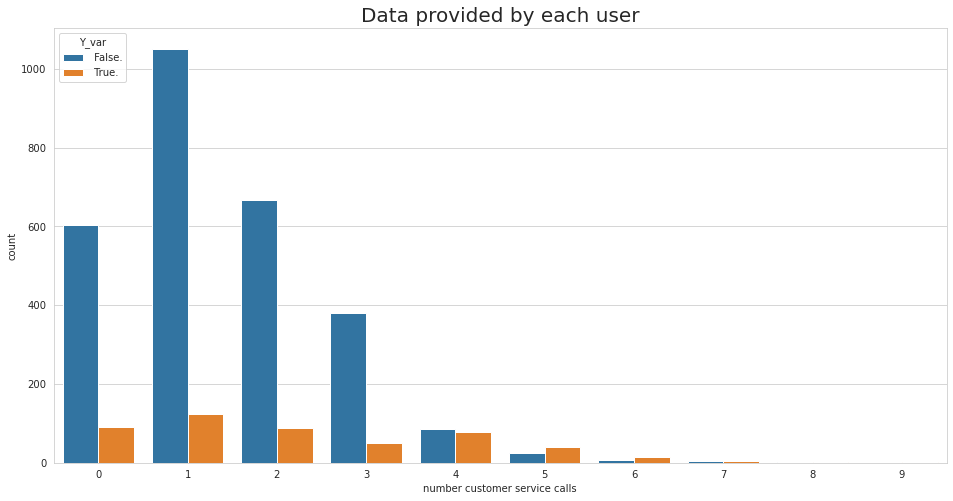

In [66]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x="number customer service calls",data=data,hue="Y_var")
plt.show()

In [67]:
x=data[data["number customer service calls"]>3]["Y_var"].value_counts()

In [68]:
print("{}% of the customers who called the company more than 3 times are classified as Churn.".format(round(x[0]/x.sum()*100,2)))

53.01% of the customers who called the company more than 3 times are classified as Churn.


* There are more churned customer who called more than 4 times to their service provider.These call may be for complaint


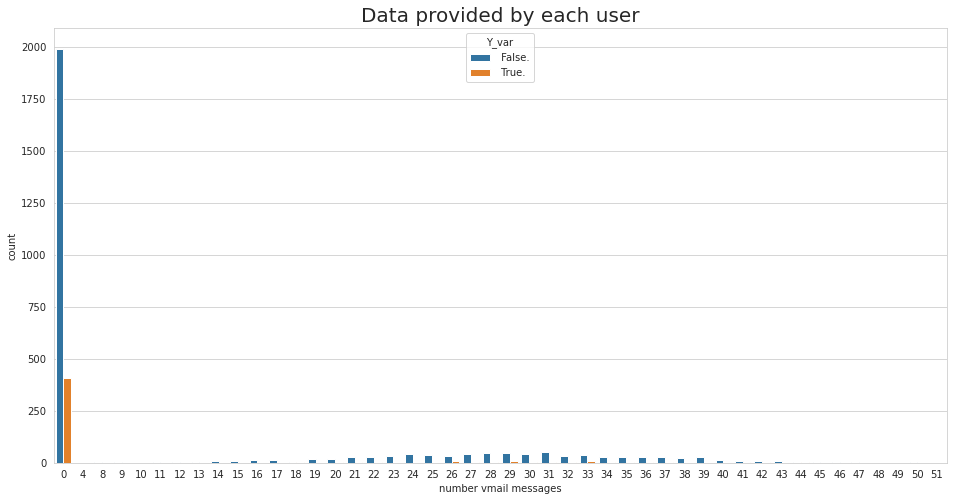

In [69]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x="number vmail messages",data=data,hue="Y_var")
plt.show()

In [70]:
#Most of the churned customer have zero voice mail message .So Some offer on voice mail charge may attract the churned customer to retain

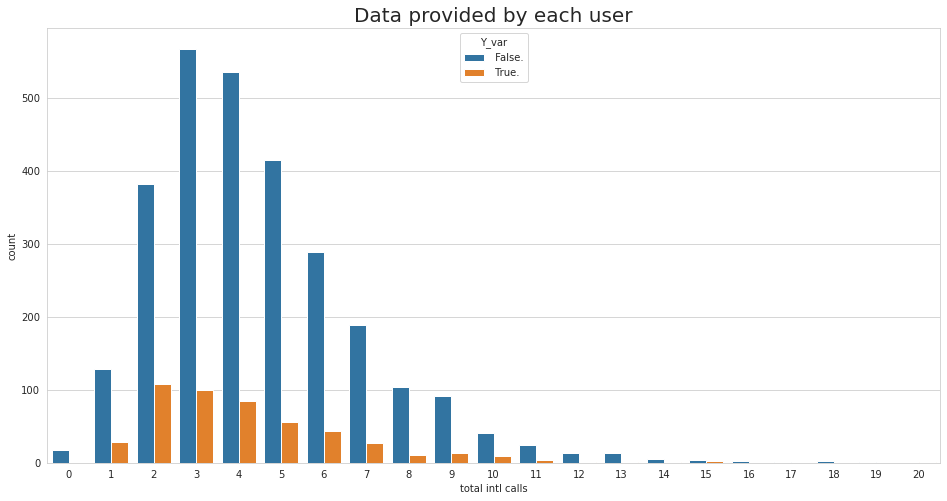

In [339]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x="total intl calls",data=data,hue="Y_var")
plt.show()

<h2> Observations <h2>

<pre>
<b>
* Our data consist of 3333 observation and 21 variables
* Data have 7 missing values .So I used Median imputation to fill the missing values ,because There are outliers in the some features So median imputation doesn't affected by outliers.
* 922 <b>customer using voice mail plan and 85 out of them are churning
* It seems most of the churned customer don't have voice mail plan .So some discount offer on voice mail can attract 
  customers to stay and experience the voice mail facillities
* Churn rate is more with customer using international plan. As only 323 customer using International plan and 158 churning out of them which is 49% approximately
* 2.76% of customer have both voice mail plan and international plan out of which customer churn rate is 45% which is    equivalent  to 1.23% of total customers
* 54% of customer having total day minutes more than 260 are more likely to churn
* For longer call duration charge is also so high .So Customers are churning in that category  
* Most of the churned customer have zero voice mail message 
* 53.01% of the customers who called the company more than 3 times are classified as Churn.
* Total Day minutes ,Total day charge,total night minutes had outliers.I used IQR method to remove those outlier from dataset
* all the features follows normal distribution
</b>
<pre>

In [72]:
data.to_csv("cleaned Churn History Dataset.csv")